In [ ]:
!pip install wandb

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
import wandb
from wandb.keras import WandbCallback

In [38]:
wandb.init(project="WeatherPredict")

epoch,▁▂▃▃▄▅▅▆▁▂▃▃▄▅▆▇▁▂▃▄▁▁▂▃▄▅▆▆▇▇▁▂▃▃▄▅▆▆▇█
loss,▅▃▁▁▁▁▁▁██▁▁▁▁▁▁█████▅▂▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁
GFLOPS,7e-05
epoch,499
loss,13.83223


In [39]:
cfg = wandb.config
cfg.learning_rate = 0.001

In [40]:
data = pd.read_csv('weatherHistory.csv')
data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [41]:
data['Formatted Date']=pd.to_datetime(data['Formatted Date'], utc=True)
data['Date']=data['Formatted Date'].map(lambda date: date.year*10000 + date.month*100 + date.day)
data['DayOfYear'] = data['Formatted Date'].dt.dayofyear
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,DayOfYear
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,20060331,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,20060331,90
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,20060401,91
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,20060401,91
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,20060401,91


In [42]:
AvgDayTem = data.groupby(['DayOfYear', 'Date'])['Temperature (C)'].mean().reset_index()
AvgDayTem

,DayOfYear,Date,Temperature (C)
0,1,20060101,4.075000
1,1,20070101,3.806713
2,1,20080101,-5.663194
3,1,20090101,-4.850926
4,1,20100101,7.807407
...,...,...,...
4014,365,20151231,-4.304861
4015,365,20161230,0.117593
4016,366,20081231,-6.218056
4017,366,20121231,-3.249306


In [43]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

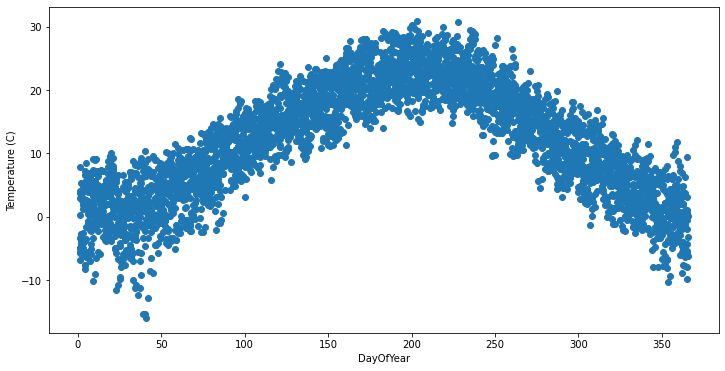

In [44]:
plt.figure(figsize=(12, 6))
plt.scatter(AvgDayTem['DayOfYear'], AvgDayTem['Temperature (C)'])
plt.xlabel('DayOfYear')
plt.ylabel('Temperature (C)')
plt.show()

In [45]:
X = AvgDayTem['DayOfYear'].values
Y = AvgDayTem['Temperature (C)'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [46]:
X_train, X_test , Y_train , Y_test = train_test_split(X ,Y ,shuffle=True)

### Model

In [47]:
model = tf.keras.models.Sequential([
    Dense(512, input_dim=1, activation='relu'),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(1, activation="linear")
])

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(cfg.learning_rate),
              loss = tf.keras.losses.MeanSquaredError()
              )

In [49]:
model.fit(X_train, Y_train, epochs=500, callbacks=[WandbCallback()])

Epoch 1/500
95/95 [==============================] - 1s 2ms/step - loss: 135.5453 - _timestamp: 1659189242.0000 - _runtime: 50.0000
Epoch 2/500
95/95 [==============================] - 0s 2ms/step - loss: 93.8434 - _timestamp: 1659189242.0000 - _runtime: 50.0000
Epoch 3/500
95/95 [==============================] - 0s 2ms/step - loss: 72.1033 - _timestamp: 1659189242.0000 - _runtime: 50.0000
Epoch 4/500
95/95 [==============================] - 0s 2ms/step - loss: 59.4336 - _timestamp: 1659189242.0000 - _runtime: 50.0000
Epoch 5/500
95/95 [==============================] - 0s 2ms/step - loss: 54.3540 - _timestamp: 1659189243.0000 - _runtime: 51.0000
Epoch 6/500
95/95 [==============================] - 0s 2ms/step - loss: 52.7113 - _timestamp: 1659189243.0000 - _runtime: 51.0000
Epoch 7/500
95/95 [==============================] - 0s 2ms/step - loss: 50.9429 - _timestamp: 1659189243.0000 - _runtime: 51.0000
Epoch 8/500
95/95 [==============================] - 0s 2ms/step - loss: 50.5157 -

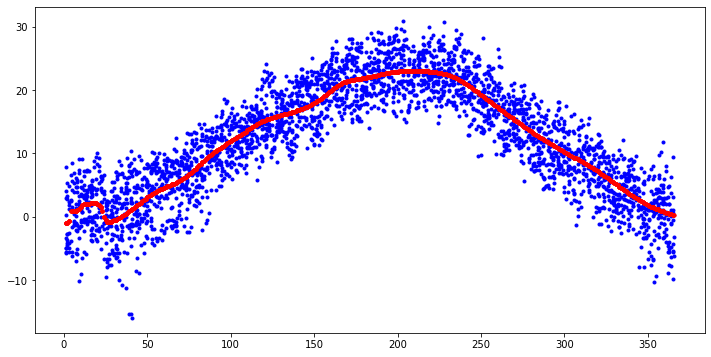

In [50]:
plt.figure(figsize=(12, 6))
Y_pred = model.predict(X_train)

plt.scatter(X_train, Y_train, c ='b' ,marker=".")
plt.plot(X_train, Y_pred, ".", c='r')

In [51]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 1ms/step - loss: 13.7540


13.754021644592285